In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
granger_df_all_T = pd.read_csv('../results_final_Jan15/granger_draft_T_signed_score.csv', index_col=0)
granger_df_all_T_pvals = pd.read_csv('../results_final_Jan15/granger_draft_T_p.csv', index_col=0)
granger_df_all_T_pvals.index = granger_df_all_T_pvals.index.str.replace('_x', '')
cluster_df = pd.read_csv('../results_final_Jan30/cluster_df_extreme_T_draft.csv', index_col=0)
df_reordered = pd.read_csv('../results_final_Jan30/granger_draft_heatmap_df_reordered.csv', index_col=0)
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
granger_df_all_T

,SAMD11,NOC2L,HES4,ISG15,AGRN,TNFRSF18,ACAP3,MXRA8,CCNL2,VWA1,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
HES4,6.929091,2.328272,0.000976,1.261528,-0.826673,1.857758,-0.167657,0.271001,-0.708670,3.448539,...,0.204619,0.850516,0.236467,0.246806,0.439507,0.217523,0.161261,-0.128765,2.310407,0.140285
CENPS,0.810146,-1.988678,-0.065490,2.602407,3.497798,3.297093,3.271064,-0.067410,1.309651,-1.198875,...,1.657128,-1.369243,0.707538,0.775803,0.096090,0.405255,1.230080,1.617863,0.527939,0.807235
SPEN,0.706294,-1.551520,-1.099499,5.235089,4.403385,2.757460,4.257019,-1.136597,1.076214,0.694996,...,2.778326,-0.075666,1.689856,1.484590,1.067686,2.252584,2.903390,2.653466,0.952402,1.650968
RUNX3,0.212551,-1.298637,0.465001,-0.380282,0.741221,-1.400622,1.172006,0.320914,1.079176,0.813704,...,1.440869,-1.282001,0.787963,1.326266,0.668322,0.385277,1.503527,1.781097,0.991326,1.153934
AHDC1,0.632672,0.642411,1.696742,0.296874,-3.751757,0.325762,-3.283466,5.165328,-0.326036,-1.750132,...,-3.004544,-0.948510,-2.620380,-1.762585,-2.282016,-5.581742,-4.720412,-4.165587,-0.320038,-2.144083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GABPA,-0.141516,3.928938,-2.976811,-1.802905,-1.133476,-1.138731,-2.120970,-6.210127,-4.507522,2.516690,...,-2.116169,1.905344,-0.592973,-1.252664,-0.129418,0.475101,-1.027977,-1.131412,-0.727645,-1.101127
BACH1,-0.146071,1.578081,1.359436,-5.971760,-3.404142,-4.703654,-1.522349,-0.690591,-1.548759,-2.217141,...,-1.866452,-2.011288,-2.324000,-1.727751,-2.482046,-3.414487,-2.339418,-1.537754,-0.747196,-2.077479
SON,0.730785,-0.096238,-1.552160,3.348796,1.405403,2.688734,0.937977,-1.479705,0.036014,1.017434,...,0.611811,1.373828,0.724637,0.360358,0.660489,1.721085,0.855782,0.599150,0.228827,0.498608
RUNX1,-0.222749,-0.635879,-0.485958,0.618596,1.644497,1.040334,1.621911,-2.651112,0.315157,-0.562623,...,0.695334,-0.032609,0.539805,0.354450,0.160130,0.860544,0.714951,1.109866,0.101900,0.430570


filter by cluster

In [4]:
tf_reordered_cluster = pd.DataFrame(index=df_reordered.index)
tf_reordered_cluster['cluster'] = tf_reordered_cluster.index.map(cluster_df['cluster'])
gene_reordered_cluster = pd.DataFrame(index=df_reordered.columns)
gene_reordered_cluster['cluster'] = gene_reordered_cluster.index.map(cluster_df['cluster'])
df_reordered_filtered = df_reordered.copy()

# Create boolean mask for TF clusters > gene clusters using broadcasting
tf_clusters = tf_reordered_cluster['cluster'].values[:, np.newaxis]
gene_clusters = gene_reordered_cluster['cluster'].values
mask = tf_clusters > gene_clusters

# Apply mask to set values to 0 
df_reordered_filtered.values[mask] = 0


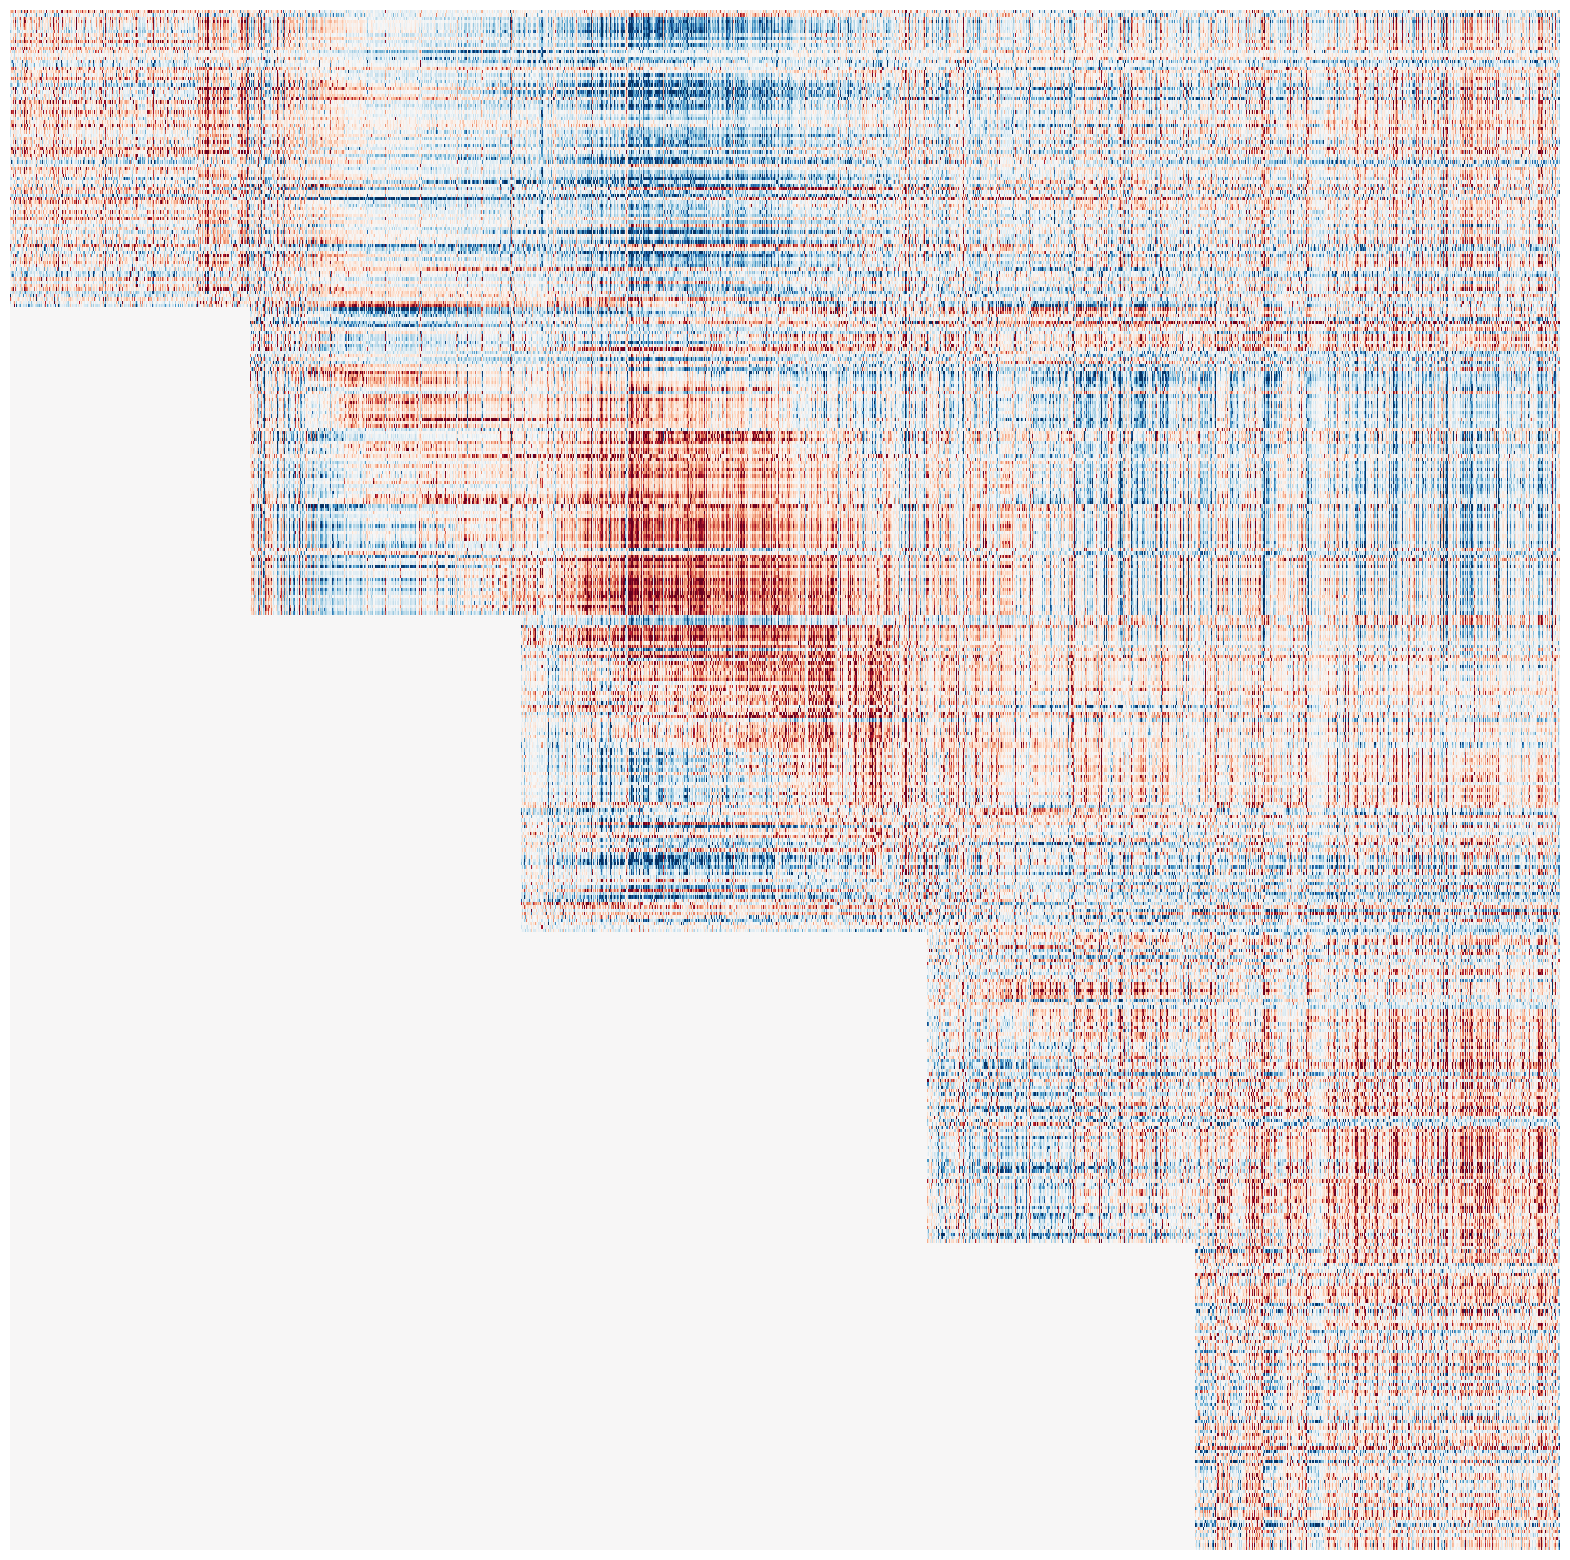

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered_filtered, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.savefig('../results_final_Jan30/granger_draft_heatmap_filtered_cluster_gene_after_tf.pdf', dpi=300, bbox_inches='tight')
plt.show()

filter by peak order

In [6]:
import scanpy as sc


from sklearn.preprocessing import StandardScaler
import seaborn as sns

adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
gene_names = adata.var_names.to_numpy()

traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
# alex_genes = open('../data/alex_genes.txt').read().splitlines()
# alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

alex_genes = granger_df_all_T.columns.to_list()
alex_tfs = granger_df_all_T.index.to_list()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]

signed_score_df = granger_df_all_T

# Extract valid names for columns and rows
valid_cols = [name for name in trends_df_sorted.index if name in signed_score_df.columns]
valid_rows = [name for name in trends_df_sorted.index if name in signed_score_df.index]

In [7]:
gene_rank_df = pd.DataFrame(index=trends_df_sorted.index)
gene_rank_df['rank'] = np.arange(len(gene_rank_df))

In [8]:
gene_ranks = gene_rank_df.loc[df_reordered.columns]
tf_ranks = gene_rank_df.loc[df_reordered.index]
df_reordered_filtered_rank = df_reordered.copy()

# Create boolean mask for TF clusters > gene clusters using broadcasting
tf_clusters = tf_ranks['rank'].values[:, np.newaxis]
gene_clusters = gene_ranks['rank'].values
mask = tf_clusters > gene_clusters

# Apply mask to set values to 0 
df_reordered_filtered_rank.values[mask] = 0

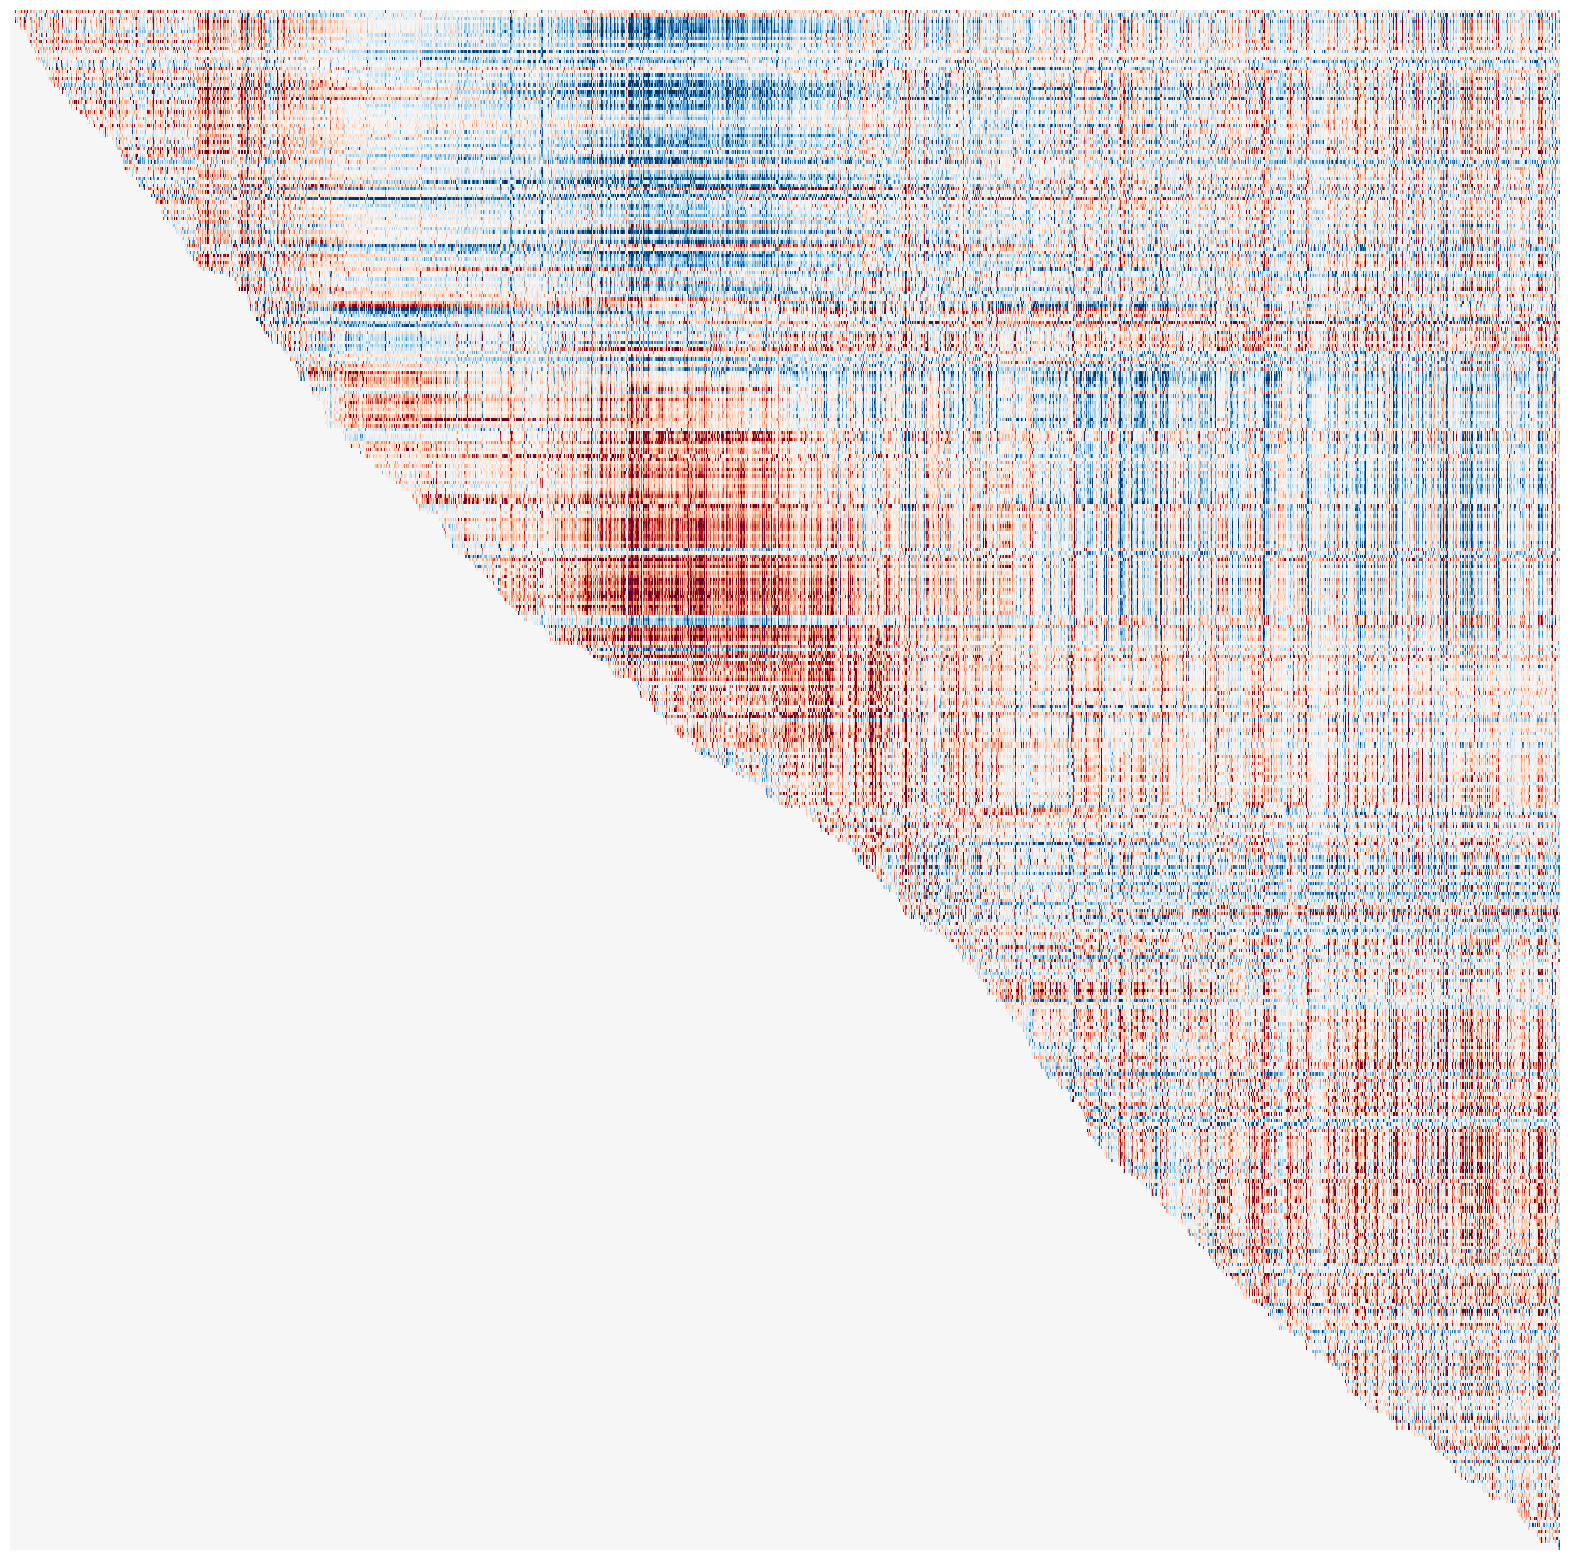

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered_filtered_rank, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.savefig('../results_final_Jan30/granger_draft_heatmap_filtered_peak_gene_after_tf.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
unique_T_regulated_df = pd.read_csv('../results_final_Jan30/unique_T_regulated_df_top10_top100.csv', index_col=0)

In [11]:
(unique_T_regulated_df['source_cluster'] <= unique_T_regulated_df['target_cluster']).sum()

520

In [12]:
pairs_filtered = unique_T_regulated_df[unique_T_regulated_df['source_cluster'] <= unique_T_regulated_df['target_cluster']]

In [13]:
len(pairs_filtered.index.unique())

79

In [14]:
pd.set_option('display.max_rows', None)
print(pairs_filtered.groupby('source').size().sort_values(ascending=True))
pd.reset_option('display.max_rows')

source
ZNF277        1
RFX3          1
GLIS3         2
ALX1          2
SON           2
NFYA          2
MBD6          2
SNAI2         2
ZNF507        2
ZNF667        3
CEBPB         3
ESRRA         3
ZNF804A       3
MAF           3
IRF2          4
ARNT          4
ZNF280B       4
GTF2IRD2B     4
HBP1          4
SMAD1         4
NR1D2         4
TET2          5
ZNF18         5
ZBTB8A        5
SHOX2         5
ZNF493        5
ZNF627        5
EBF1          6
MEIS3         6
HOXB2         6
SP1           6
IRX2          6
FOXO1         6
HEY1          6
ZNF236        6
ZNF711        6
NCOA1         7
E2F1          7
ATF3          7
HOXB8         7
ETV1          7
ZNF660        7
ZNF583        7
LEF1          8
ZNF135        8
ZNF107        8
IRX1          8
HES4          8
ZFHX3         8
ZNF713        8
FOXS1         8
ZFX           8
MKX           8
SCMH1         8
DNTTIP1       8
NR2F2         8
TBX2          9
HOXB13        9
REL           9
ARID5B        9
ZNF134        9
MEF2D         9
S

In [15]:
pairs_filtered.to_csv('../results_final_Jan30/unique_T_regulated_df_top10_top100_filtered_cluster_gene_after_tf.csv')

In [16]:
unique_T_regulated_df['source_peak_rank'] = unique_T_regulated_df.index.map(gene_rank_df['rank'])
unique_T_regulated_df['target_peak_rank'] = unique_T_regulated_df['target'].map(gene_rank_df['rank'])

In [17]:
pairs_filtered_rank = unique_T_regulated_df[unique_T_regulated_df['source_peak_rank'] <= unique_T_regulated_df['target_peak_rank']]
pairs_filtered_rank.to_csv('../results_final_Jan30/unique_T_regulated_df_top10_top100_filtered_peak_gene_after_tf.csv')

In [18]:
len(pairs_filtered_rank.index.unique())

74

In [19]:
pd.set_option('display.max_rows', None)
print(pairs_filtered_rank.groupby('source').size().sort_values(ascending=True))
pd.reset_option('display.max_rows')

source
MAF           1
CEBPB         1
HBP1          2
ALX1          2
MBD6          2
NFYA          2
SON           2
ARID5B        2
SNAI2         2
LEF1          3
ZNF667        3
ESRRA         3
SMAD1         3
ZNF804A       3
ZNF493        3
GTF2IRD2B     3
EBF1          4
NR1D2         4
SHOX2         4
TGIF2         4
IRF2          4
ZNF18         4
ZNF280B       4
ARNT          4
NCOA1         5
MEIS3         5
ZNF236        5
ZNF627        5
ZBTB8A        5
TET2          5
ZNF711        5
HEY1          5
ZNF713        6
HOXB2         6
FOXO1         6
HES4          6
IRX2          6
E2F1          6
SP1           6
ZFX           6
HOXB8         6
ZNF583        7
ZNF107        7
ATF3          7
NR2F2         7
ETV1          7
FOXS1         7
ZNF135        7
ZNF660        7
MKX           8
IRX1          8
MEF2D         8
SCMH1         8
ZFHX3         8
DNTTIP1       8
ZNF626        9
SPEN          9
TBX2          9
TEAD1         9
ZEB2          9
ZEB1          9
REL           9
P